In [1]:
# Load
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")

Loading required package: NLP
Loading required package: RColorBrewer


In [4]:
data <- c("F:\\IITC\\ADM\\HW\\HW1\\20news-bydate\\20news-bydate-test")
str(data)

 chr "F:\\IITC\\ADM\\HW\\HW1\\20news-bydate\\20news-bydate-test"


In [5]:
news <- Corpus(DirSource(data, recursive=TRUE),readerControl = list(reader=readPlain))

In [6]:
news

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1585

In [7]:
head(news)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 6

In [8]:
str(news)

List of 1585
 $ 10003 :List of 2
  ..$ content: chr [1:30] "From: d.gellert@trl.oz.au (Dennis Gellert)" "Subject: Re: Why is my mouse so JUMPY? (MS MOUSE)" "Lines: 25" "Organization: Telecom Research" ...
  ..$ meta   :List of 7
  .. ..$ author       : chr(0) 
  .. ..$ datetimestamp: POSIXlt[1:1], format: "2017-02-13 16:46:11"
  .. ..$ description  : chr(0) 
  .. ..$ heading      : chr(0) 
  .. ..$ id           : chr "10003"
  .. ..$ language     : chr "en"
  .. ..$ origin       : chr(0) 
  .. ..- attr(*, "class")= chr "TextDocumentMeta"
  ..- attr(*, "class")= chr [1:2] "PlainTextDocument" "TextDocument"
 $ 10004 :List of 2
  ..$ content: chr [1:23] "From: paladin@world.std.com (Thomas G Schlatter)" "Subject: Re: Dos window macros" "Organization: The World Public Access UNIX, Brookline, MA" "Distribution: usa" ...
  ..$ meta   :List of 7
  .. ..$ author       : chr(0) 
  .. ..$ datetimestamp: POSIXlt[1:1], format: "2017-02-13 16:46:11"
  .. ..$ description  : chr(0) 
  .. ..$ heading 

In [9]:
tdm <- TermDocumentMatrix(news, control=list(wordLengths=c(4,Inf))) #Term Document Matrix 

#Verify Frequent Terms 
m <- as.matrix(tdm)
 
v <- sort(rowSums(m), decreasing=TRUE) 

d <- data.frame(word = names(v),freq=v) 


head(d, 10)

,word,freq
that,that,3684
have,have,2104
with,with,2025
this,this,1920
from:,from:,1601
subject:,subject:,1594
lines:,lines:,1588
organization:,organization:,1560
writes:,writes:,1191
article,article,1009


In [10]:
 news <- tm_map(news, removeWords,"Subject") 
 news <- tm_map(news, removeWords,"Organization") 
 news <- tm_map(news, removeWords,"writes") 
 news <- tm_map(news, removeWords,"From") 
 news <- tm_map(news, removeWords,"lines") 
 news <- tm_map(news, removeWords," NNTP-Posting-Host") 
 news <- tm_map(news, removeWords,"article")	


In [11]:
news <- tm_map(news, tolower) ## Convert to Lower Case 

news <- tm_map(news, removeWords, stopwords("english")) ## Remove Stopwords 

news <- tm_map(news, removePunctuation) ## Remove Punctuations 

#news <- tm_map(news, stemDocument) ## Stemming 

news <- tm_map(news, removeNumbers) ## Remove Numbers 

news <- tm_map(news, stripWhitespace) ## Eliminate Extra White Spaces 

news <- tm_map(news , PlainTextDocument)


In [12]:
dtm <- DocumentTermMatrix(news,control=list(wordLengths=c(4,Inf)))
dtm

<<DocumentTermMatrix (documents: 1585, terms: 26931)>>
Non-/sparse entries: 131332/42554303
Sparsity           : 100%
Maximal term length: 163
Weighting          : term frequency (tf)

In [13]:
tdm <- TermDocumentMatrix(news, control=list(wordLengths=c(4,Inf))) #Term Document Matrix 
tdm
#Verify Frequent Terms 
m <- as.matrix(tdm)
 
v <- sort(rowSums(m), decreasing=TRUE) 

d <- data.frame(word = names(v),freq=v) 


head(d, 10)



<<TermDocumentMatrix (terms: 26931, documents: 1585)>>
Non-/sparse entries: 131332/42554303
Sparsity           : 100%
Maximal term length: 163
Weighting          : term frequency (tf)

,word,freq
lines,lines,1592
will,will,840
like,like,815
windows,windows,775
university,university,773
nntppostinghost,nntppostinghost,737
just,just,695
know,know,668
time,time,557
think,think,534


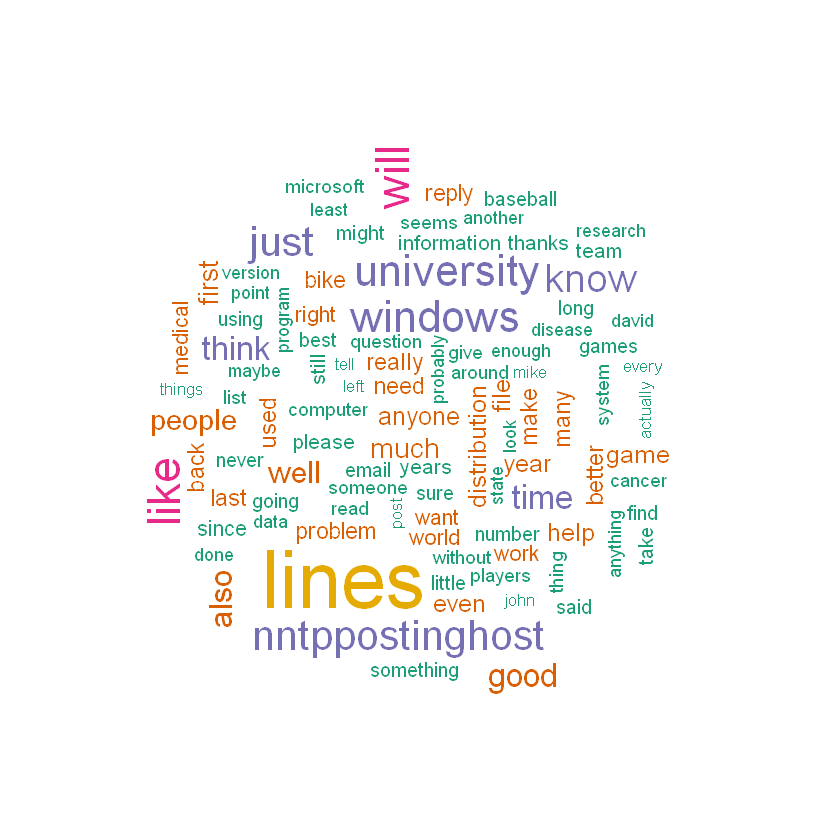

In [14]:
dtms <- removeSparseTerms(dtm, 0.15) # Prepare the data 

freq <- colSums(as.matrix(dtm)) # Find word frequencies 

dark2 <- brewer.pal(6, "Dark2") 

wordcloud(names(freq), freq, max.words=100, rot.per=0.2, colors=dark2)


In [15]:
dtm_tfxidf2<- weightTfIdf(dtm)

In [17]:
str(dtm_tfxidf2)

List of 6
 $ i       : int [1:131332] 1 1 1 1 1 1 1 1 1 1 ...
 $ j       : int [1:131332] 625 883 1010 1220 1664 1926 2073 3184 3899 3931 ...
 $ v       : Named num [1:131332] 0.0357 0.0226 0.1053 0.0325 0.0857 ...
  ..- attr(*, "names")= chr [1:131332] "1" "1" "1" "1" ...
 $ nrow    : int 1585
 $ ncol    : int 26931
 $ dimnames:List of 2
  ..$ Docs : chr [1:1585] "character(0)" "character(0)" "character(0)" "character(0)" ...
  ..$ Terms: chr [1:26931] "aaaaarrrrgh" "aaaah" "aaareadmetxt" "aabxhaafqmbmiqkxgk" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency - inverse document frequency (normalized)" "tf-idf"


In [20]:
library(factoextra)
library(cluster)
library(NbClust)
library(pryr)

Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate


Attaching package: 'pryr'

The following object is masked from 'package:tm':

    inspect



In [22]:
NbClust(dtm, diss="NULL", distance="euclidean", min.nc=2, max.nc=10, method="euclidean", index="all", alphaBeale=0.1)



ERROR: Error: cannot allocate vector of size 5.4 Gb
